<a href="https://colab.research.google.com/github/riarahmasp/C_Study-Case_4/blob/main/Kelompok_C_Study_Case_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Study Case 04 - Data Mining dan Business Intelligence:
Korelasi dan Regresi</font></strong></h2></center>

**KELOMPOK C**
1. Dwight J.O.Hutagalung (2006571160)
2. Ruth Intan Davina (2006483246)
3. Maria Angelica Christabel (2006483593)
4. Rafa Elmira Afiani (2006486153)
5. Ria Rahma Septiani (2006536246)
6. Daranita Sukmajati (2006570946)
7. Siskawati Simandalahi (2006572970)
8. Widyadari Dhiya Parahita (2006572913)

##**Import Data**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

In [ ]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

In [ ]:
print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


##**Pre-Processing**

In [ ]:
print(df.isnull().sum())

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64


In [ ]:
#Menghapus variabel 'year_built' dan 'floor_count' karena missing values pada kedua kolom terlalu banyak 
df.drop(['year_built', 'floor_count'], axis = 1, inplace = True)
df

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


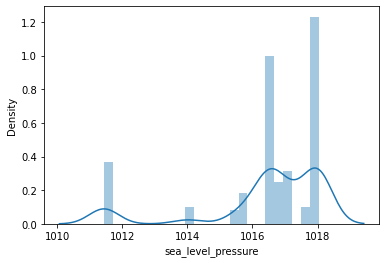

In [ ]:
#Mengatasi Missing Value
p = sns.distplot(df['sea_level_pressure'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


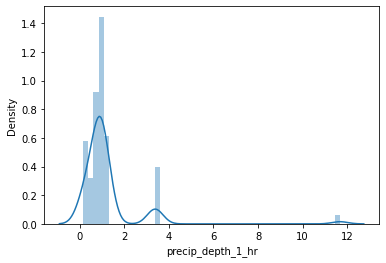

In [ ]:
p = sns.distplot(df['precip_depth_1_hr'])

In [ ]:
p = sns.distplot(df['cloud_coverage'])

Dapat dilihat karena sea level pressure condong kiri dan precip death 1 hr condong kanan, akan diisi missing value dengan median sementara cloud coverage akan diisi dengan mean

In [ ]:
df['cloud_coverage'] = df['cloud_coverage'].fillna(df['cloud_coverage'].mean())
df['precip_depth_1_hr'] = df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].median())
df['sea_level_pressure'] = df['sea_level_pressure'].fillna(df['sea_level_pressure'].median())

In [ ]:
#Mengubah tipe data
df['primary_use'] = df['primary_use'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1413 non-null   float64 
 1   primary_use         1413 non-null   category
 2   square_feet         1413 non-null   int64   
 3   air_temperature     1413 non-null   float64 
 4   cloud_coverage      1413 non-null   float64 
 5   dew_temperature     1413 non-null   float64 
 6   precip_depth_1_hr   1413 non-null   float64 
 7   sea_level_pressure  1413 non-null   float64 
 8   wind_direction      1413 non-null   float64 
 9   wind_speed          1413 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 101.5 KB


##**EDA**

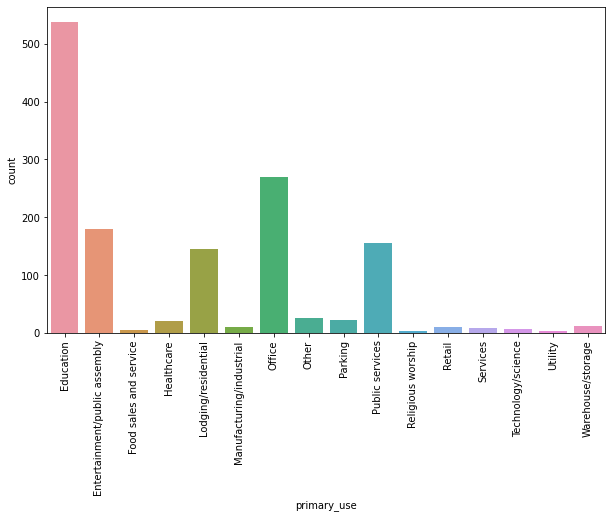

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='primary_use',data=df)
plt.xticks(rotation='vertical')
plt.show()

Dari grafik di atas, terlihat bahwa kategori yang paling sering dilakukan di gedung tersebut adalah kegiatan *Education*. Sedangkan kegiatan yang paling jarang dilakukan adalah kegiatan *Utility* dan kegiatan *Religious Worship*.

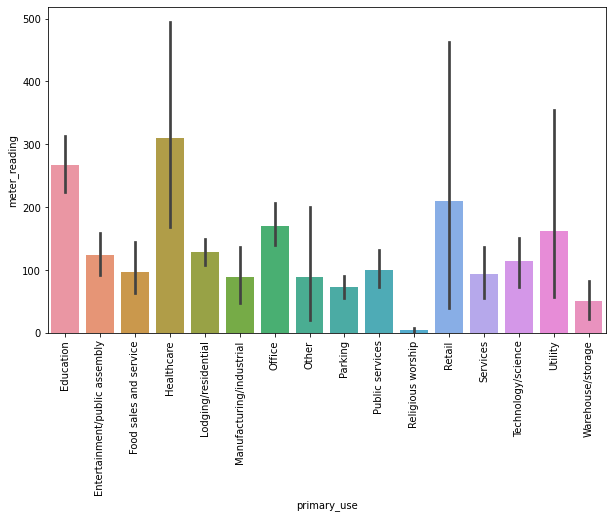

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='primary_use',y='meter_reading',data=df)
plt.xticks(rotation='vertical')
plt.show()

Dapat dilihat dari grafik di atas, *Healthcare*, *Retail*, dan *Education* menjadi pengguna listrik tertinggi. Terlihat pula untuk Healthcare, Retail, *Utility*, dan *Other* memiliki outlier yang jaraknya cukup jauh dari rata-ratanya.

In [ ]:
df["primary_use"].value_counts()

Education                        537
Office                           269
Entertainment/public assembly    179
Public services                  155
Lodging/residential              145
Other                             25
Parking                           22
Healthcare                        21
Warehouse/storage                 12
Retail                            11
Manufacturing/industrial          10
Services                           9
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [ ]:
energy_avg = df["meter_reading"].groupby(df["primary_use"]).mean()
print(energy_avg)

primary_use
Education                        266.690745
Entertainment/public assembly    123.170221
Food sales and service            96.372528
Healthcare                       309.476976
Lodging/residential              128.541808
Manufacturing/industrial          89.383883
Office                           170.117480
Other                             89.251035
Parking                           72.326071
Public services                   99.870828
Religious worship                  4.762342
Retail                           209.889978
Services                          93.846495
Technology/science               114.000695
Utility                          161.868339
Warehouse/storage                 50.796869
Name: meter_reading, dtype: float64


Dari hasil rata-rata energi yang dikeluarkan oleh masing-masing aktivitas, terlihat bahwa *Healthcare* mengeluarkan energi paling banyak, yaitu sebesar 309,476976. Sedangkan jika dilihat dari jumlah gedung yang digunakan untuk *Healthcare*, hanya ada sebanyak 21 gedung yang dapat dikatakan cenderung sedikit. Hal ini mengindikasikan bahwa gedung dengan kategori *Healthcare* memiliki rata-rata konsumsi yang cukup besar dan juga dana yang dikeluarkan besar.

Kemudian, terlihat bahwa gedung dengan kategori *Education* mengeluarkan energi paling banyak kedua, yaitu sebesar 266,690745 dengan jumlah gedung paling banyak, yaitu sebanyak 537 gedung. Hal ini menunjukkan bahwa dikarenakan jumlah gedung yang banyak, konsumsi energi yang digunakan juga cukup besar.

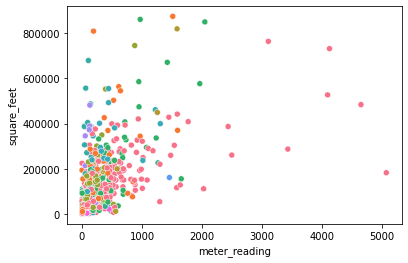

In [ ]:
p1 = sns.scatterplot(data=df, x='meter_reading', y='square_feet', hue='primary_use', legend=False)

Dari hasil plot di atas, terlihat bahwa bangunan cenderung memiliki luas bangunan di bawah 200000 kaki persegi dan memiliki penggunaan listrik sebesar 0-1000 kWh. Namun, dapat dilihat terdapat bangunan dengan luas bangunan yang cenderung kecil tetapi mengonsumsi listrik dengan sangat tinggi dan terdapat juga bangunan dengan luas bangunan yang tinggi, tetapi mengonsumsi daya listrik yang cenderung rendah.

##**Korelasi dan Regresi**

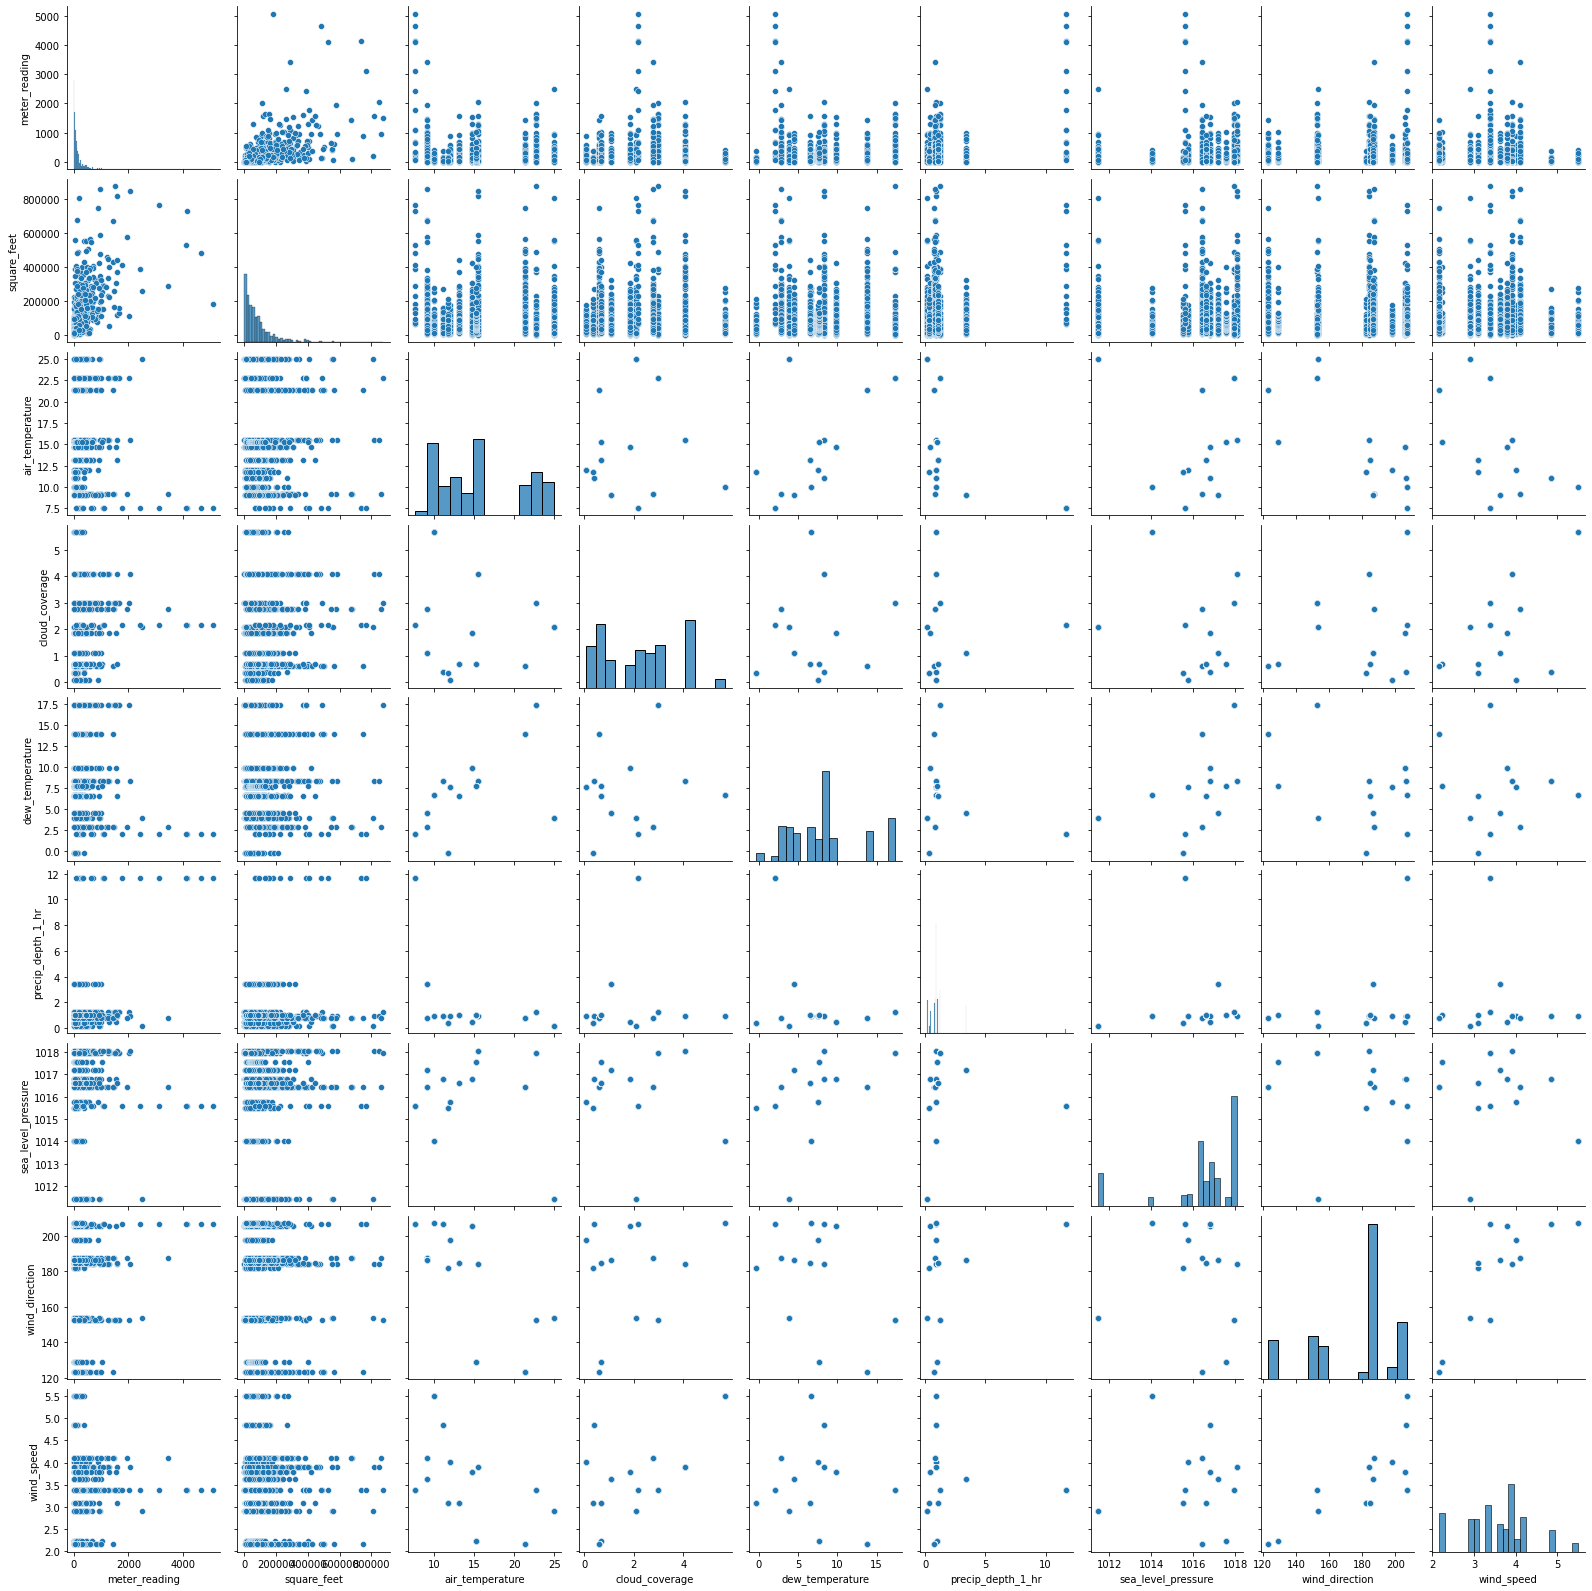

In [ ]:
p = sns.pairplot(df)

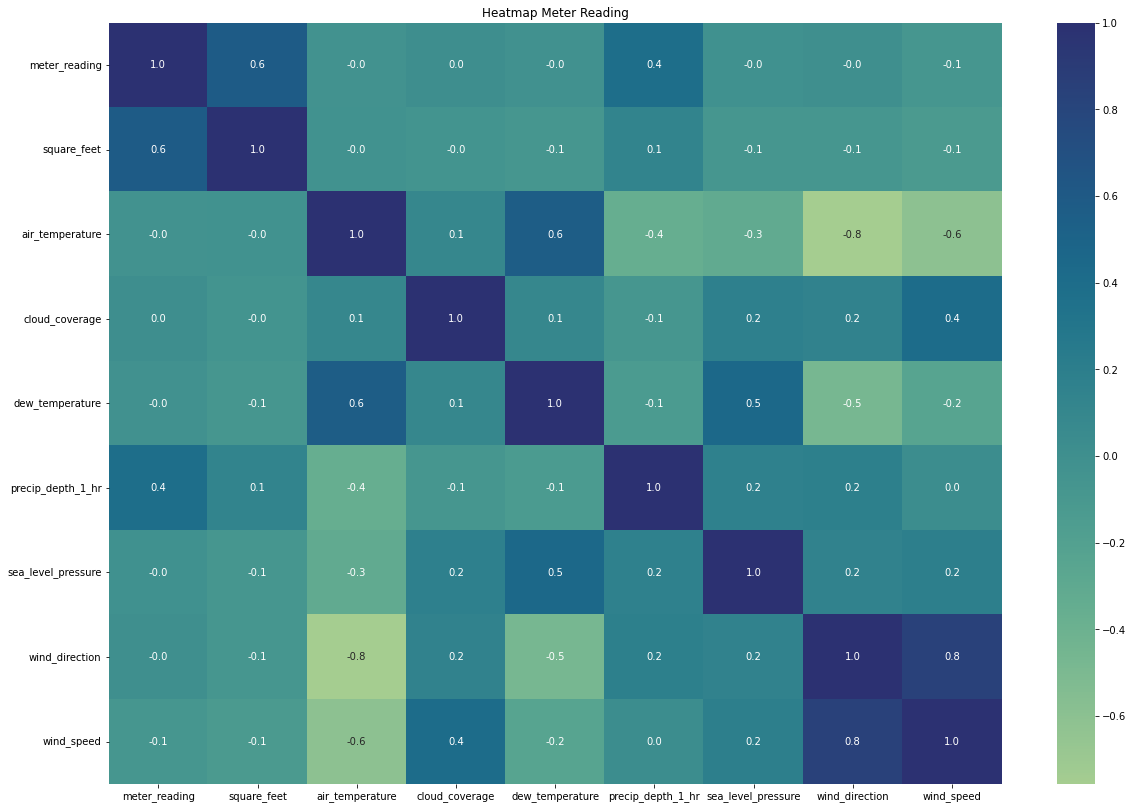

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,14))
ax = sns.heatmap(corr, annot=True, fmt=".1f",cmap="crest").set(title="Heatmap Meter Reading")

Selanjutnya akan dicari model regresi yang digunakan untuk menggambarkan data.

In [ ]:
#Mencoba dengan dummy
m = ols('meter_reading ~ C(primary_use) + square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     61.38
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          8.77e-187
Time:                        09:04:20   Log-Likelihood:                -9899.3
No. Observations:                1413   AIC:                         1.984e+04
Df Residuals:                    1390   BIC:                         1.997e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

m = ols('meter_reading ~ square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     167.0
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.05e-179
Time:                        09:20:09   Log-Likelihood:                -9951.1
No. Observations:                1413   AIC:                         1.992e+04
Df Residuals:                    1405   BIC:                         1.996e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4334.0961   7963

Dapat dilihat bahwa masih terdapat beberapa variabel yang belum signifikan p-valuenya. Maka, akan dicoba dicari model yang baik (yang variabelnya signifikan seluruhnya) dengan pertama-tama menghilangkan variabel air temperature.

In [ ]:
#Menghilangkan variabel yang paling tidak signifikan
m = ols('meter_reading ~ square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.64e-180
Time:                        09:39:50   Log-Likelihood:                -9950.0
No. Observations:                1413   AIC:                         1.992e+04
Df Residuals:                    1405   BIC:                         1.996e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.358e+04   5256

Dapat dilihat bahwa sekarang seluruh variabelnya signifikan sehingga dapat dikatakan bahwa model di atas merupakan model regresi yang cukup baik untuk melakukan prediksi. Sekarang akan dicoba metode variable selection stepwise

In [ ]:
#Variable Selection: Stepwise di Analisis Regresi

def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)
print(model.summary())

meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_direction + cloud_coverage + dew_temperature + wind_speed + 1
0.4861701561255959
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     61.73
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.32e-187
Time:                        09:06:06   Log-Likelihood:                -9897.3
No. Observations:                1413   AIC:                         1.984e+04
Df Residuals:                    1390   BIC:                         1.996e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          

Dapat dilihat bahwa menggunakan metode variabel selection, didapat model dengan variabel yang p-valuenya tidak signifikan, sehingga akan tetap digunakan model sebelumnya yaitu:

m = ols('meter_reading ~ square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', df).fit()

1. Nilai Koefisien regresi untuk variabel square_feet adalah 0.0018 yang artinya setiap penambahan satu unit square_feet akan terjadi penambahan *meter reading* sebesar 0.0018 kWh dengan syarat variabel lain konstan.
2. Nilai koefisien regresi untuk variabel precip depth 1 hr adalah 90.1614 yang artinya setiap penambahan satu unit precip depth 1 hr maka terjadi penambahan meter reading sebesar 90.1614 kWh dengan syarat variabel lain konstan.
3. Nilai koefisien regresi variabel cloud coverage adalah 26.6733 yang artinya setiap penambahan satu unit cloud coverage maka akan terjadi penambahan meter reading sebesar 26.6733 dengan syarat variabel lain konstan.
4. Nilai koefisien regresi variabel wind direction adalah 2.7915 yang artinya setiap penambahan satu unit wind direction maka akan terjadi penambahan meter reading sebesar 2.7915 dengan syarat variabel lain konstan.
5. Nilai koefisien regresi variabel dew temperature adalah 13.2179 yang artinya setiap penambahan satu unit dew temperature maka akan terjadi penambahan meter reading sebesar 13.2179 dengan syarat variabel lain konstan.
6. Nilai koefisien regresi variabel sea level pressure adalah -23.6555 yang artinya setiap penambahan satu unit sea level pressure maka akan terjadi pengurangan meter reading sebesar 23.6555 dengan syarat variabel lain konstan.
7. Nilai koefisien regresi variabel wind speed adalah -77.4531 yang artinya setiap penambahan satu unit wind speed maka akan terjadi pengurangan meter reading sebesar 77.4531 dengan syarat variabel lain konstan.

##**Kesimpulan dan Saran**

###**Kesimpulan**

1. Gedung dengan kategori *Healthcare* menjadi gedung yang paling banyak mengonsumsi energi listrik dibandingkan kategori-kategori lainnya.
2. Dari hasil grafik heatmap, nilai korelasi antar variabel cenderung tidak terlalu tinggi.

Untuk kesimpulan lebih detail, dapat dilihat pada tiap interpretasi kode di atas.

###**Saran untuk Data Engineer**

Data yang digunakan masih memuat banyak missing values, terutama pada variabel floor_count dan year_built. Sebaiknya, hal ini lebih diperhatikan dalam proses pengambilan data ke depannya karena bisa saja variabel ini dapat berguna untuk menganalisis data dan mendapatkan insight.

###**Rekomendasi untuk PT Ashrae Energy**

1. Terlihat bahwa setiap penambahan satu unit precip depth 1 hr maka terjadi penambahan meter reading sebesar 90.1614 kWh di mana nilainya tersebut cenderung besar. Rekomendasi dari kami adalah sebaiknya PT Ashrae Energy bekerja sama dengan pengelola gedung untuk lebih mengurus endapan air hujan yang terjadi karena hal tersebut berkaitan dengan tingginya konsumsi energi.
2. Untuk mendapat penggunaan energi yang lebih kecil, disarankan untuk mencari gedung dengan wind speed dan sea level pressure terbesar dan mencari gedung dengan luas tanah, cloud coverage, dew temperature, precip depth,  dan win direction terkecil.